In [1]:
import nilearn
import pandas as pd
import numpy as np
import os

In [2]:
data = pd.read_csv('./data/participants.csv')

In [3]:
data.tail(10)

,id,age,gender,diagnosis,study
326,A00037495,49,M,Control,cobre
327,A00037564,50,M,Control,cobre
328,A00037619,55,M,Schizophrenia_Strict,cobre
329,A00037649,40,F,Schizophrenia_Strict,cobre
330,A00037665,43,M,Control,cobre
331,A00037007,60,M,Control,cobre
332,A00037854,21,M,Schizophrenia_Strict,cobre
333,A00038172,30,M,Schizoaffective,cobre
334,A00038441,52,M,Schizophrenia_Strict,cobre
335,A00038624,45,M,Schizophrenia_Strict,cobre


In [4]:
subjects = os.listdir('./data/images/Control')\
           + os.listdir('./data/images/Schizoaffective')\
           + os.listdir('./data/images/Schizophrenia')\
           + os.listdir('./data/images/Schizophrenia_Strict')

In [5]:
for i in range(len(subjects)):
    subjects[i] = subjects[i][4:-30]

In [6]:
%%bash
mkdir ./data/connection 
mkdir ./data/connection/Control
mkdir ./data/connection/Schizoaffective
mkdir ./data/connection/Schizophrenia
mkdir ./data/connection/Schizophrenia_Strict

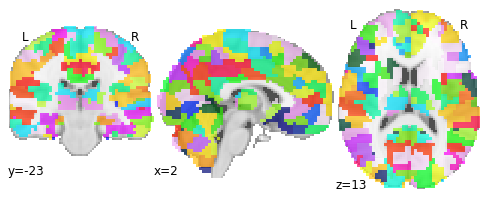

In [7]:
from nilearn import plotting

basc = nilearn.datasets.fetch_atlas_basc_multiscale_2015().scale444
plotting.plot_roi(basc, draw_cross=False)

In [8]:
from nilearn.input_data import NiftiLabelsMasker

masker = NiftiLabelsMasker(labels_img=basc, standardize=True, memory='nilearn_cache', verbose=1)

In [9]:
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(kind='correlation')

In [10]:
%%time

for index, row in data.iterrows():
    type_ = ''
    
    if row['diagnosis'] == 'Control':
        type_ = 'Control'
    
    elif row['diagnosis'] == 'Schizoaffective':
        type_ = 'Schizoaffective'
        
    elif row['diagnosis'] == 'Schizophrenia':
        type_ = 'Schizophrenia'
        
    elif row['diagnosis'] == 'Schizophrenia_Strict':
        type_ = 'Schizophrenia_Strict'
        
    file = './data/images/'+type_+'/sub-'+row['id']+'_task-rest_bold_MNI_3mm.nii.gz'
    time_series = masker.fit_transform(file)
    correlation_matrix = correlation_measure.fit_transform([time_series])[0]
    np.savez_compressed('./data/connection/'+type_+'/sub-'+row['id'], correlation_matrix)

[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
Resampling labels
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-1

[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
[NiftiLabelsMasker.f

[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
[NiftiLabelsMasker.f

[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia/sub-50004_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff6f87646a0>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
 

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 3.0s, 0.1min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia/sub-50013_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff6f865ec18>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
  'low_pass'

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 2.6s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia/sub-50022_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff6f8754c18>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
  'low_pass'

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 2.5s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia/sub-50033_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff734677198>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
  'low_pass'

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 3.1s, 0.1min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia/sub-50047_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff72c2465f8>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
  'low_pass'

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 2.8s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia/sub-50053_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff6f87b9898>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
  'low_pass'

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 3.1s, 0.1min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia/sub-50060_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff6fb82eeb8>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
  'low_pass'

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 2.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia/sub-50073_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff6f87646a0>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
  'low_pass'

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 2.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia/sub-50083_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff6f8605eb8>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
  'low_pass'

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 3.2s, 0.1min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia_Strict/sub-A00014830_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff6f8605eb8>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
 

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 2.9s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-A00024301_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff72c2467f0>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
  'low_pass': 

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 2.8s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia_Strict/sub-A00024198_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff6f8605e80>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
 

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 2.8s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia_Strict/sub-A00023750_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff6f8764390>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
 

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 2.9s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-A00024546_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff6f8605eb8>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
  'low_pass': 

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 2.3s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-A00022687_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff6f87a4e48>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
  'low_pass': 

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 2.6s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-A00022509_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff734677e10>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
  'low_pass': 

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 2.8s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-A00021081_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff6f87642b0>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
  'low_pass': 

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 2.8s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia_Strict/sub-A00022500_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff6f87b9898>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
 

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 2.9s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizoaffective/sub-A00020416_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff6f8754c18>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
  'low

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 2.9s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia_Strict/sub-A00019293_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff6f8605e80>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
 

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 2.8s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia_Strict/sub-A00016723_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff6f8764400>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
 

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 2.8s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia_Strict/sub-A00000541_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff72c246630>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
 

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 3.3s, 0.1min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia_Strict/sub-A00017147_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff72c246630>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
 

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 3.2s, 0.1min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizoaffective/sub-A00014175_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff734677198>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
  'low

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 2.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia_Strict/sub-A00000909_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff6f8764400>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
 

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 3.3s, 0.1min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-A00015826_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff6f8605ef0>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
  'low_pass': 

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 2.6s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia_Strict/sub-A00021598_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff72c2467f0>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
 

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 2.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia_Strict/sub-A00027391_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff72c2467b8>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
 

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 2.9s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizoaffective/sub-A00019750_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff6f86050b8>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
  'low

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 2.9s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-A00027487_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff6f87b9898>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
  'low_pass': 

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 3.0s, 0.1min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia_Strict/sub-A00028805_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff734677198>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
 

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 2.9s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia_Strict/sub-A00031597_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff6f8754c18>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
 

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 2.5s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizoaffective/sub-A00035859_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff6f8764400>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
  'low

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 3.1s, 0.1min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-A00036897_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff734677198>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
  'low_pass': 

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 2.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-A00037495_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff72c2467b8>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
  'low_pass': 

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 3.4s, 0.1min
[NiftiLabelsMasker.fit_transform] loading data from /home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia_Strict/sub-A00037854_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7ff6fb8565f8>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/neuro/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
 